In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv(r'C:\Users\dell\Desktop\python specialclass\MLproject-weekends\creditcardfrauddetection\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
# Amount columns: mean transaction amount: 88.349619, std is 250.120109 indicating a wide variability in the transaction
# amount wrt the mean, min transaction amount is 0 (most probably cancelled transactions), 25% of the transactions are less
# than or equal to 5.6, 50% (Median) of the transactions are less than or equal to 22, 75% of the transactions are less than or equal
# to 77.165, however the max is 25691.160000 which is huge.
# So some transactions are very large and hence pull the mean higher as mean is sensitive to outliers and not median, hence
# median is lower than the mean.So the distribution is skewed to the right.

In [15]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
df.shape

(284807, 31)

In [17]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

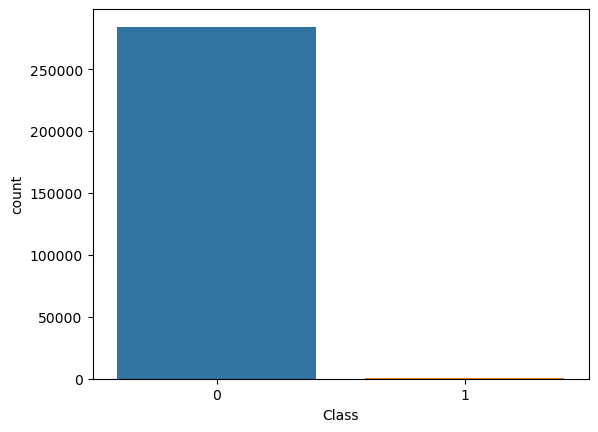

In [18]:
sns.countplot(df['Class'])

In [19]:
# The frequency of fraudalent transaction (Class=1) is very very low. It is a highly imbalanced dataset.

<AxesSubplot:xlabel='Amount', ylabel='Density'>

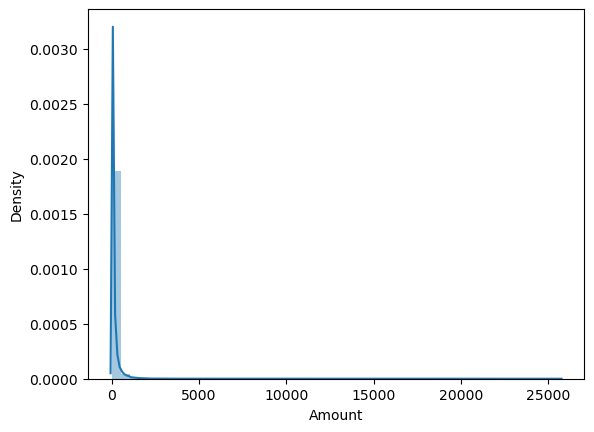

In [20]:
sns.distplot(df['Amount'])

In [21]:
# Most of the amounts are very small, ranging in a few hundred euros, so later we need to scale

<AxesSubplot:xlabel='Time', ylabel='Density'>

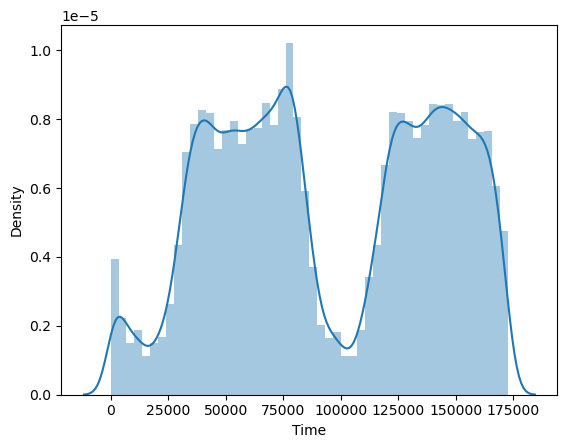

In [22]:
sns.distplot(df['Time'])

In [23]:
# This time part has huge difference, need to be scaled later on.

In [24]:
# Although having a correlation matrix is not that much helpful as all the columns have been transformed through PCA (also
# done for dimensionality reduction), since not much meaningful information we have through out the columns, only some
# random information.

In [25]:
corr_matrix=df.corr()
print(corr_matrix)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

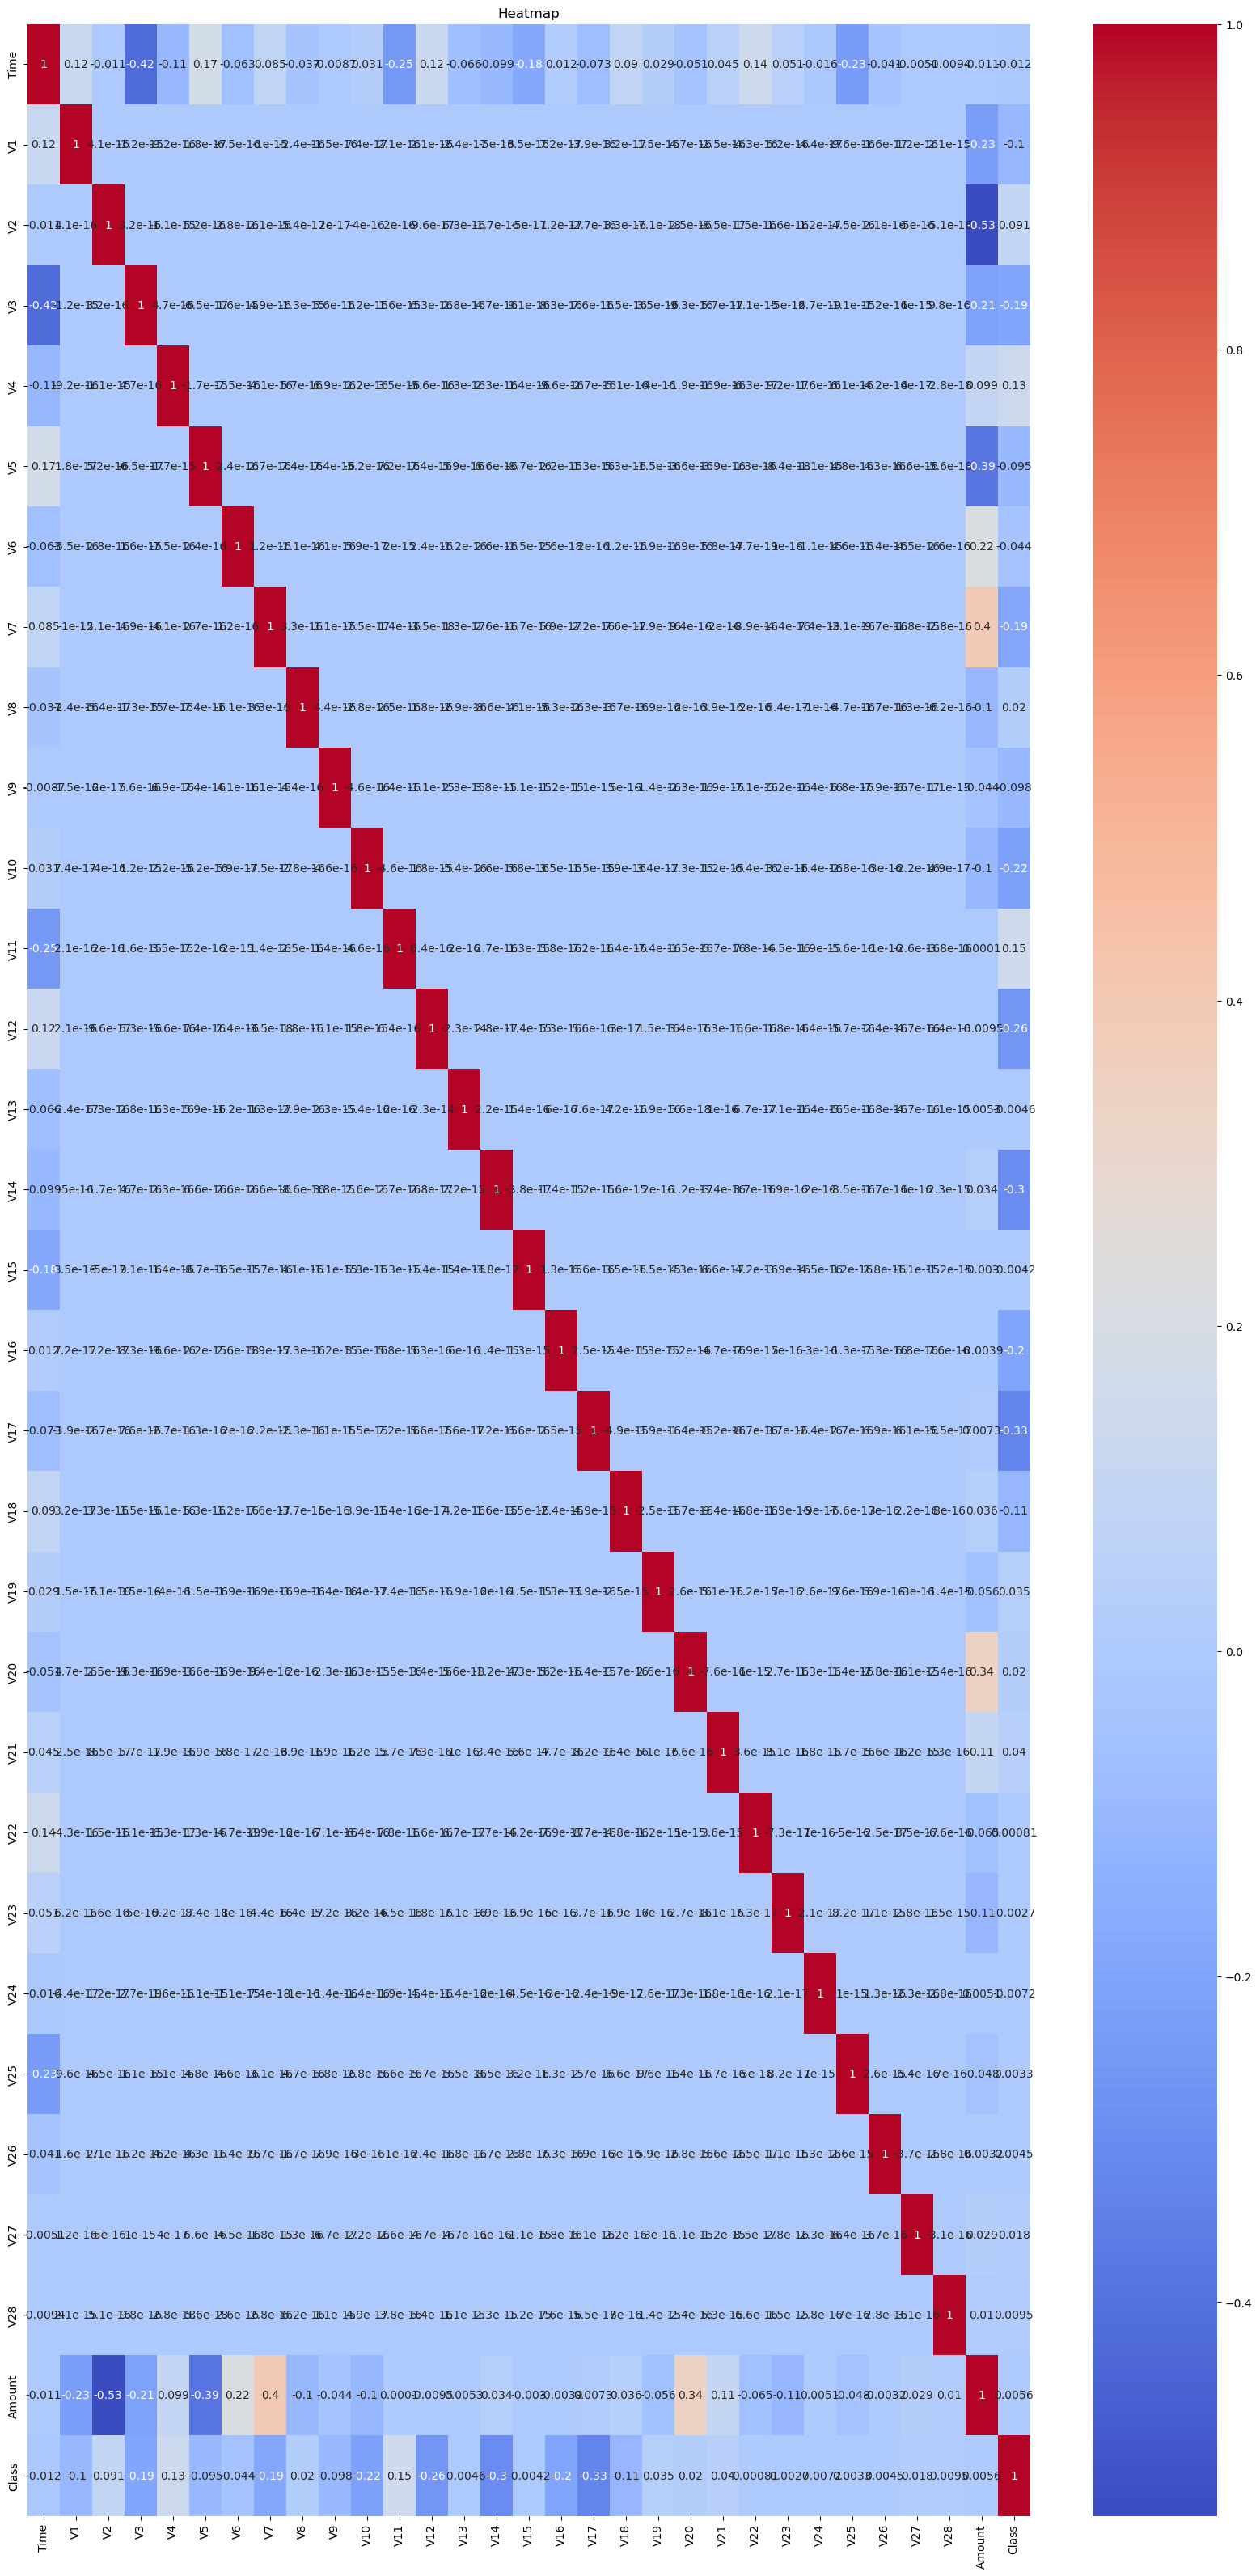

In [26]:
plt.figure(figsize=(20,40))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Heatmap')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
X=df.drop('Class',axis=1)
Y=df['Class']

In [30]:
#sc=StandardScaler()

In [31]:
#X_scaled=sc.fit_transform(X)

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [33]:
sc=StandardScaler()

In [34]:
X_train=sc.fit_transform(X_train)

In [35]:
X_test=sc.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,precision_recall_curve,average_precision_score,roc_curve,roc_auc_score,accuracy_score

In [37]:
from sklearn.metrics import f1_score

In [38]:
# Since Confusion matrix accuracy is not meaningful for an imbalanced dataset, hence no need for roc_curve,roc_auc_score,accuracy_score.
# Rather accuracy can be measured using Area under Precision Recall Curve through average_precision_score as it focuses more on 
# the minority class.
# Average Precision is the average of precisions at various recall levels.

In [39]:
model1=LogisticRegression()

In [40]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [41]:
Y_pred=model1.predict(X_test)

In [42]:
Y_pred_proba=model1.predict_proba(X_test)[:,1]

In [43]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [44]:
print(average_precision_score(Y_test,Y_pred_proba))

0.7438198809990315


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model2=RandomForestClassifier(n_jobs=-1)

In [47]:
model2.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1)

In [48]:
Y_pred=model2.predict(X_test)

In [49]:
Y_pred_proba=model2.predict_proba(X_test)[:,1]

In [50]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [51]:
print(average_precision_score(Y_test,Y_pred_proba))

0.8606171288329394


In [52]:
import xgboost as xgb

In [53]:
model3=xgb.XGBClassifier(n_jobs=-1)

In [54]:
model3.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
Y_pred=model3.predict(X_test)

In [56]:
Y_pred_proba=model3.predict_proba(X_test)[:,1]

In [57]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [58]:
print(average_precision_score(Y_test,Y_pred_proba))

0.8776846378469083


In [59]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [60]:
model_xgb_tuned=xgb.XGBClassifier()

In [61]:
param_grid={
    'max_depth':[3,15],
    'learning_rate':[0.01,0.3],
    'n_estimators':[50,200],
    'subsample':[0.5,1.0],
    'colsample_bytree':[0.5,1.0]
}

In [62]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [63]:
grid_search=GridSearchCV(estimator=model_xgb_tuned,param_grid=param_grid,cv=cv,n_jobs=-1,verbose=2,scoring='average_precision')

In [64]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=Non

In [65]:
best_model_xgb=grid_search.best_estimator_
print("Best hyperparameters are:",grid_search.best_params_)

Best hyperparameters are: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [66]:
Y_pred=best_model_xgb.predict(X_test)

In [67]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [68]:
Y_pred_proba=best_model_xgb.predict_proba(X_test)[:,1]

In [69]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.8674202859757226


In [51]:
class PSO:
    def __init__(self,n_particles,n_iterations,dim,bounds,X_train,Y_train):
        self.n_particles=n_particles
        self.n_iterations=n_iterations
        self.dim=dim
        self.bounds=np.array(bounds)
        self.X_train=X_train
        self.Y_train=Y_train
        
        #Set random seed for reproducibility
        #if seed is not None:
        #    np.random.seed(seed)
    
    #Initialization of positions and velocities
        self.positions=np.array([
            np.random.uniform(low=self.bounds[:,0],high=self.bounds[:,1])
            for _ in range(n_particles)
        ])
        self.velocities=np.random.uniform(low=-1,high=1,size=(n_particles,dim))
    #Initialization of pbest and gbest
        self.pbest_positions=self.positions.copy()
        self.pbest_scores=np.array([float('inf')]*n_particles)
        self.gbest_position=None
        self.gbest_score=float('inf')
    def evaluate(self):
        for i in range(self.n_particles):
            params={
                'max_depth':int(self.positions[i][0]),
                'learning_rate':self.positions[i][1],
                'n_estimators':int(self.positions[i][2]),
                'subsample':self.positions[i][3],
                'colsample_bytree':self.positions[i][4]
            }
            model=xgb.XGBClassifier(**params,random_state=42)
            model.fit(self.X_train,self.Y_train)
            #predictions_proba=model.predict_proba(self.X_train)[:,1]
            #score=average_precision_score(self.Y_train,predictions_proba)
            predictions=model.predict(self.X_train)
            #score=accuracy_score(self.Y_train,predictions)
            score=f1_score(self.Y_train,predictions,average='weighted')
            
            if score < self.pbest_scores[i]:
                self.pbest_scores[i]=score
                self.pbest_positions[i]=self.positions[i]
                
            if score < self.gbest_score:
                self.gbest_score=score
                self.gbest_position=self.positions[i]
    #Initialization of velocity and positions
    def update_velocity_position(self,w,c1,c2):
        for i in range(self.n_particles):
            r1=np.random.rand(self.dim)
            r2=np.random.rand(self.dim)
            
            self.velocities[i]=(w*self.velocities[i]+c1*r1*(self.pbest_positions[i]-self.positions[i])
            +c2*r2*(self.gbest_position-self.positions[i]))
            
            self.positions[i]+=self.velocities[i]
            self.positions[i]=np.clip(self.positions[i],self.bounds[:,0],self.bounds[:,1])
    def optimize(self):
        for _ in range(self.n_iterations):
            self.evaluate()
            self.update_velocity_position(w=0.5,c1=1.5,c2=1.5)
        return self.gbest_position,self.gbest_score

In [52]:
# Define the parameter bounds
bounds = [
    (3, 15),       # max_depth
    (0.1, 0.3),   # learning_rate
    (100,300),     # n_estimators
    (0.5, 1.0),    # subsample
    (0.5, 1.0)     # colsample_bytree
]

In [53]:
pso=PSO(n_particles=20,n_iterations=10,dim=5,bounds=bounds,X_train=X_train,Y_train=Y_train)

In [54]:
best_position,best_score=pso.optimize()
print("Best Hyperparameters:",best_position)
print("Best score:",best_score)

Best Hyperparameters: [3.00000000e+00 1.00000000e-01 1.01988213e+02 5.00000000e-01
 5.00665612e-01]
Best score: 0.9995990225621186


In [55]:
best_params={
    'max_depth':int(best_position[0]),
    'learning_rate':best_position[1],
    'n_estimators':int(best_position[2]),
    'subsample':best_position[3],
    'colsample_bytree':best_position[4]
}

In [56]:
# XGBoost
xgb_class=xgb.XGBClassifier(**best_params,random_state=42)
xgb_class.fit(X_train,Y_train)
Y_pred=xgb_class.predict(X_test)
Y_pred_proba=xgb_class.predict_proba(X_test)[:,1]
print(classification_report(Y_test,Y_pred))
print("Average Precision Score",average_precision_score(Y_test,Y_pred_proba))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Average Precision Score 0.8727605660028392
